Develop A Neural Network That Can Read Handwriting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [2]:
mnist= tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


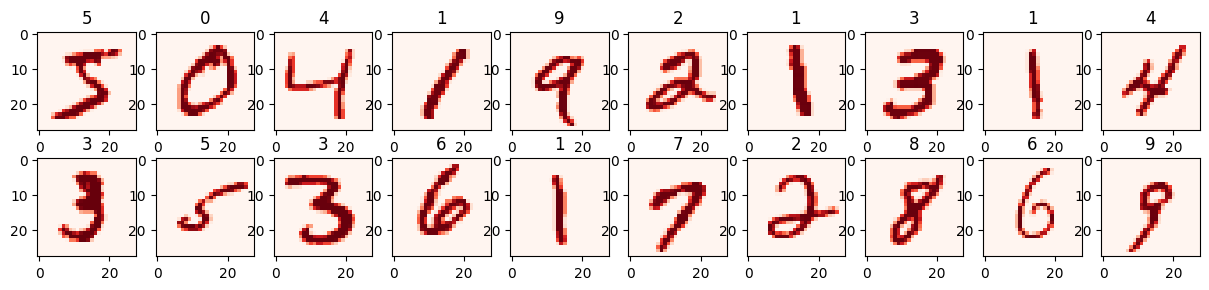

In [4]:
fig=plt.figure(figsize=(15,3))
for i in range(20):
  ax=fig.add_subplot(2,10,i+1)
  ax.imshow(np.squeeze(x_train[i]),cmap='Reds')
  ax.set_title(y_train[i])

In [5]:
print(x_train.shape)
print(x_train[0])

(60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 25

In [6]:
xtrain = x_train/255.0
xtest = x_test/255.0

In [7]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28,28)),
                                    tf.keras.layers.Dense(128, activation ='relu'),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss ='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [10]:
model.fit(xtrain,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2623 - accuracy: 0.9257
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1174 - accuracy: 0.9651
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0803 - accuracy: 0.9760
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0597 - accuracy: 0.9821
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0457 - accuracy: 0.9864


In [11]:
model.fit(xtrain,y_train, epochs=9)

Epoch 1/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0374 - accuracy: 0.9883
Epoch 2/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0303 - accuracy: 0.9903
Epoch 3/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0244 - accuracy: 0.9920
Epoch 4/9
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0197 - accuracy: 0.9939
Epoch 5/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0162 - accuracy: 0.9953
Epoch 6/9
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0132 - accuracy: 0.9962
Epoch 7/9
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0125 - accuracy: 0.9961
Epoch 8/9
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0097 - accuracy: 0.9972
Epoch 9/9
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0085 - accuracy: 0.9974


In [12]:
print(model.evaluate(x_test,y_test))

313/313 [==============================] - 1s 2ms/step - loss: 22.0774 - accuracy: 0.9767
[22.077350616455078, 0.9767000079154968]


In [13]:
history=model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.1)

Epoch 1/10
1688/1688 [==============================] - 6s 4ms/step - loss: 5.3556 - accuracy: 0.9889 - val_loss: 2.6669 - val_accuracy: 0.9928
Epoch 2/10
1688/1688 [==============================] - 7s 4ms/step - loss: 1.7274 - accuracy: 0.9950 - val_loss: 3.0552 - val_accuracy: 0.9928
Epoch 3/10
1688/1688 [==============================] - 7s 4ms/step - loss: 2.2302 - accuracy: 0.9940 - val_loss: 3.1716 - val_accuracy: 0.9927
Epoch 4/10
1688/1688 [==============================] - 10s 6ms/step - loss: 2.0168 - accuracy: 0.9939 - val_loss: 3.0688 - val_accuracy: 0.9935
Epoch 5/10
1688/1688 [==============================] - 7s 4ms/step - loss: 1.7244 - accuracy: 0.9952 - val_loss: 3.7673 - val_accuracy: 0.9912
Epoch 6/10
1688/1688 [==============================] - 6s 4ms/step - loss: 1.6766 - accuracy: 0.9948 - val_loss: 2.5133 - val_accuracy: 0.9932
Epoch 7/10
1688/1688 [==============================] - 7s 4ms/step - loss: 1.5472 - accuracy: 0.9952 - val_loss: 2.6666 - val_accuracy

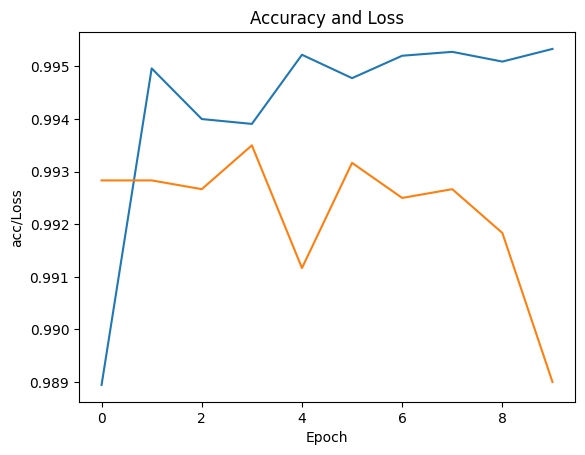

In [14]:
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history["val_accuracy"],label='val')
plt.show()

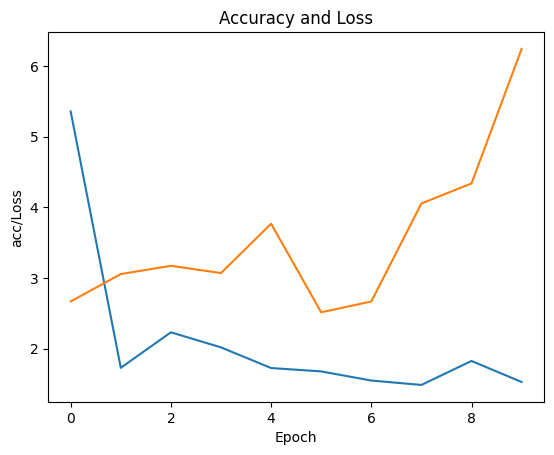

In [15]:
plt.title("Accuracy and Loss")
plt.xlabel("Epoch")
plt.ylabel("acc/Loss")
plt.plot(history.history['loss'],label='acc')
plt.plot(history.history["val_loss"],label='val')
plt.show()

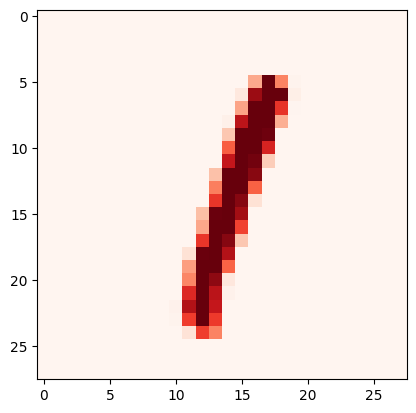

In [20]:
plt.imshow(np.squeeze(x_test[5]),cmap="Reds")

In [21]:
prediction=model.predict(x_test)
print(np.argmax(prediction[5]))

313/313 [==============================] - 0s 2ms/step
1


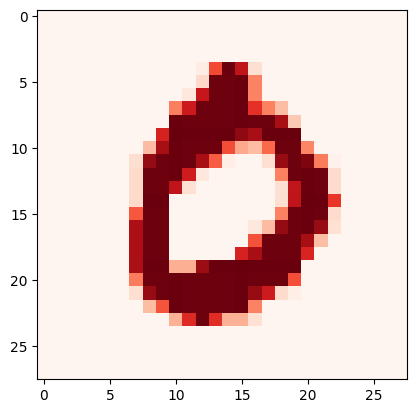

In [18]:
plt.imshow(np.squeeze(x_test[3]),cmap="Reds")

In [19]:
prediction=model.predict(x_test)
print(np.argmax(prediction[3]))

313/313 [==============================] - 0s 2ms/step
0
